# Example 02

## 1. Importing libraries

In [1]:
import sys, os
path = os.getcwd().split('\\examples')[0]
sys.path.append(path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflores.models.multilayer_perceptron import MultilayerPerceptron
from tensorflores.utils.clustering import ClusteringMethods

## 2. Load Dataset

In [3]:
df = pd.read_csv(path + '\\data\\emission_total.csv')
df.head(5)

,CO2 (g/s) [estimated maf],CO2 (g/s) [maf],estimated_maf,intake_pressure,intake_temperature,latitude,longitude,maf,rpm,speed
0,0.809921,0.639659,3.798529,26.0,54.0,-5.793477,-35.198093,3.0,1568.0,43.0
1,1.796942,2.132196,8.427658,57.0,53.0,-5.793538,-35.198116,10.0,1582.0,43.0
2,2.199995,2.132196,10.317979,69.0,53.0,-5.793600,-35.198139,10.0,1600.0,43.0
3,1.226761,0.639659,5.753511,38.0,54.0,-5.793665,-35.198170,3.0,1625.0,44.0
4,0.756202,0.426439,3.546585,24.0,54.0,-5.793739,-35.198196,2.0,1586.0,45.0


In [4]:
scaler = MinMaxScaler()

In [5]:
values_df = scaler.fit_transform(df[['intake_pressure', 'intake_temperature', 'speed', 'CO2 (g/s) [maf]']])

In [6]:
X = values_df[:,0:3]
y = values_df[:,3:]

## 3. Splitting the data

In [7]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## 4. Define the model

### 4.1 Define hidden layers and neurons

In [9]:
hidden_layer_sizes = [16, 8]             

### 4.2 Define activaction functions

In [10]:
['relu', 'relu', 'linear']

['relu', 'relu', 'linear']

In [11]:
activation_functions = ['relu', # Hidden layer (16 neurons)
                        'relu', # Hidden layer (8 neurons)
                       'linear'] # Output layer (8 neurons)

### 4.3 Define input and output size

In [12]:
input_size = X.shape[1]
output_size = y.shape[1]

### 4.4 Activates quantization-aware training

In [13]:
training_with_quantization = True

### 4.5 Define the type of weight initialisation

In [14]:
weight_bias_init = 'RandomNormal'

### 4.6 Create the TensorFlores class

In [15]:
nn = MultilayerPerceptron(input_size = input_size,
                            hidden_layer_sizes = hidden_layer_sizes,
                            output_size = output_size ,
                            activation_functions = activation_functions,
                            weight_bias_init = weight_bias_init,
                            training_with_quantization = training_with_quantization)


### 4.7 Choose the quantization method

- Autocloud 
    - bias_clustering_method = Clustering_method.autocloud_biases(threshold_biases = 1.4148)
    - weight_clustering_method = Clustering_method.autocloud_weight(threshold_weights = 1.4148)

- Meanshift
    - weight_clustering_method = Clustering_method.meanshift_weight(bandwidth_weights = 0.005)
    - bias_clustering_method = Clustering_method.meanshift_biases(bandwidth_biases = 0.005)

- Affinity Propagation
    - weight_clustering_method = Clustering_method.affinity_propagation_weight(affinityprop_damping_bias = 0.65)
    - bias_clustering_method = Clustering_method.affinity_propagation_biases(affinityprop_damping_weight = 0.7)

- DBSTREAM
    - weight_clustering_method = Clustering_method.dbstream_weight(clustering_threshold_bias = 0.8)
    - bias_clustering_method = Clustering_method.dbstream_biases(clustering_threshold_weight = 0.1)

In [16]:
Clustering_method = ClusteringMethods()

bias_clustering_method = Clustering_method.autocloud_biases(threshold_biases = 1.4148)
weight_clustering_method = Clustering_method.autocloud_weight(threshold_weights = 1.4148)

### 4.8 Define training epochs

In [17]:
epochs =  100
epochs_quantization = epochs

### 4.9 Define the batch size

In [18]:
batch_size = 36

### 4.9 Define the loss function

- 'mean_squared_error'
- 'cross_entropy'
- 'mean_absolute_error'
- 'binary_cross_entropy'

In [19]:
loss_function = 'mean_squared_error'

### 4.10 Define the metric to calculate the distance between the centroids of the clusters and the values of weights and/or biases

- "euclidean"
- "manhattan"
- "minkowski"
- "chebyshev"
- "cosine"
- "hamming"
- "bray_curtis"
- "jaccard"
- "wasserstein"
- "dtw"

In [20]:
distance_metric = "euclidean"

### 4.10 Define the optimizer

- 'sgd'
- 'adam'
- 'adamax'

In [21]:
optimizer = 'sgd'

In [22]:
nn.train(X = X_train, 
         y = y_train,
         epochs = epochs, 
         learning_rate = 0.0001,
         loss_function=loss_function, 
         optimizer=optimizer, 
         batch_size=batch_size, 
         epochs_quantization = epochs_quantization,
         distance_metric = distance_metric, 
         bias_clustering_method = bias_clustering_method,
         weight_clustering_method = weight_clustering_method,
         validation_split = 0.2)

Epoch 1/100, Loss: 0.10072994797778839, Val Loss: 0.06287218274927675
Epoch 1/100, Loss: 0.20489693979250828, Val Loss: 6.893512014567428, Bias Clusters: 2, Weight Clusters: 4
Epoch 2/100, Loss: 4.795046155343399, Val Loss: 14.791769105497718, Bias Clusters: 3, Weight Clusters: 5
Epoch 3/100, Loss: 7.205137178918047, Val Loss: 268.8987792935452, Bias Clusters: 3, Weight Clusters: 7
Epoch 4/100, Loss: 3.467005454671355, Val Loss: 11.958441714738678, Bias Clusters: 3, Weight Clusters: 5
Epoch 5/100, Loss: 3.662199250964253, Val Loss: 0.04999424740865841, Bias Clusters: 3, Weight Clusters: 5
Epoch 6/100, Loss: 0.03702545545527812, Val Loss: 0.04999424740865841, Bias Clusters: 3, Weight Clusters: 5
Epoch 7/100, Loss: 0.04380092267480405, Val Loss: 0.04999424740865841, Bias Clusters: 3, Weight Clusters: 5
Epoch 8/100, Loss: 0.03132087664224897, Val Loss: 0.04999424740865841, Bias Clusters: 3, Weight Clusters: 5
Epoch 9/100, Loss: 0.07130175679233544, Val Loss: 0.0499303690445834, Bias Clust

In [23]:
error = nn.predict(X_test) - y_test

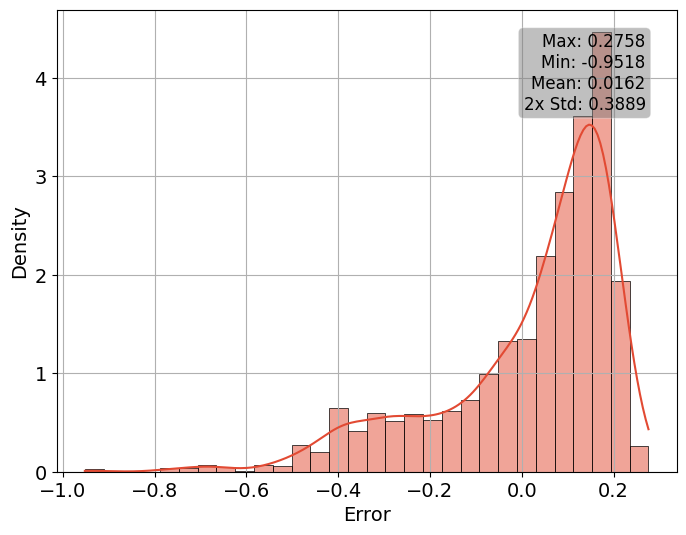

In [24]:
# Estatísticas
error_mean = np.mean(error)
error_std = np.std(error)
error_max = np.max(error)
error_min = np.min(error)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Estilo do gráfico
plt.style.use('ggplot')

# Plotando histograma com KDE (Densidade) sem legenda
sns.histplot(error, bins=30, color='coral', edgecolor='black', stat="density", kde=True, legend=False, ax=ax)

# Configuração dos eixos
ax.set_xlabel('Error', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
#ax.set_title('Error Distribution', fontsize=15)
ax.tick_params(labelsize=14)
ax.grid(True)

# Definindo limites do eixo X
#ax.set_xlim(error_min, error_max)

# Exibir os valores estatísticos no gráfico
textstr = '\n'.join((
    f'Max: {error_max:.4f}',
    f'Min: {error_min:.4f}',
    f'Mean: {error_mean:.4f}',
    f'2x Std: {2 * error_std:.4f}'
))
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.savefig('./figures/example_02.pdf', bbox_inches='tight', pad_inches=0, dpi=300)
# Exibir gráfico
plt.show()

### 4.11 Save model as C++

In [25]:
nn.save_model_as_cpp('./tensorflores_QAT_Autocloud')

Model C++ saved!


### 4.12 Save model as json

In [26]:
nn.save_model_as_json('./tensorflores_QAT_Autocloud')

Model saved successfully as './tensorflores_QAT_Autocloud.json'!


### 4.12 Load model from json

In [27]:
json_data = nn.load_json_model('./tensorflores_QAT_Autocloud')
json_data

Successfully loaded JSON file: ./tensorflores_QAT_Autocloud.json


{'model_quantized': True,
 'num_layers': 3,
 'layers': [{'activation': 'relu',
   'weights': [[0, 5, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 5, 4],
    [0, 0, 4, 4, 0, 3, 2, 2, 2, 4, 2, 2, 3, 4, 4, 2],
    [4, 5, 5, 2, 2, 4, 2, 2, 2, 5, 3, 4, 2, 2, 5, 0]],
   'biases': [0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 1, 0]},
  {'activation': 'relu',
   'weights': [[0, 1, 2, 0, 0, 2, 2, 0],
    [3, 4, 2, 0, 3, 2, 4, 3],
    [2, 4, 2, 0, 0, 0, 2, 2],
    [0, 0, 1, 2, 2, 0, 2, 2],
    [0, 5, 0, 2, 2, 1, 5, 0],
    [5, 2, 0, 2, 5, 5, 0, 2],
    [3, 0, 2, 1, 0, 2, 2, 2],
    [2, 2, 4, 0, 2, 4, 0, 5],
    [4, 0, 0, 1, 1, 0, 0, 2],
    [2, 2, 0, 0, 2, 0, 4, 2],
    [0, 0, 0, 1, 2, 2, 0, 5],
    [0, 2, 0, 1, 0, 0, 4, 2],
    [4, 2, 1, 2, 5, 2, 0, 5],
    [0, 4, 2, 5, 2, 5, 0, 2],
    [0, 2, 0, 2, 2, 0, 0, 4],
    [0, 1, 2, 2, 0, 2, 2, 0]],
   'biases': [1, 0, 0, 0, 2, 2, 1, 1]},
  {'activation': 'linear',
   'weights': [[2], [2], [0], [1], [2], [0], [0], [3]],
   'biases': [0]}],
 'centers_bias': [-0.00